Отборочное задание Евраз. Исп.Бочаров А.М. скайп bam271074




Сталь обрабатывают в металлическом ковше вместимостью около 110 тонн.	Чтобы	ковш	выдерживал	высокие	температуры,	изнутри	его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.
Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).
Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.
Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки стали МНЛЗ. Оттуда готовый продукт выходит в виде заготовок-рельс, каждая из которых пилится на 4 отрезка - крата.


Задача
Изучите данные физико-химического процесса
легирования сталей. Создайте алгоритм определения
химического состава шлака по исходным данным.
Файл «Исходные данные.csv» 
(данные по плавкам о количестве добавок, расходе э/э, 
 химическом анализе стали и хим анализ шлака, забираемых в начале плавки и в конце). 
Данные требуется очистить, в трети выборки показатели хим анализа отсутствуют, 
их нужно занулить. Зафиксировать самую популярную по плавкам марку стали и для нее
спрогнозировать целевой состав шлака.


In [33]:
import pandas as pd  #for work with dataframes
from datetime import datetime
import matplotlib.pyplot as plt  # lib for plots
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error  #for metric of our model
from sklearn.model_selection import GridSearchCV
RS=42   #we will fix random state

import warnings
warnings.filterwarnings('ignore')

In [34]:
#let s build dataframe with our dataset
df_train = pd.read_csv('d:\\2021\\hackatones\\EVRAZ\\Исходные данные.csv',sep=';',
                       index_col=0,decimal=',')
df_train.tail()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
7036,г68386398<;,2071-04-21 19:50:00,Э90ХАФ,Р65,41.0,42.333333,23.200000,42.166667,3.380628,0.537080,...,0.10,2.6,22.2,7.0,60.6,0.4,6.2,0.06,2.7,22.8
7037,г68386398<<,2071-04-21 20:45:00,Э90ХАФ,Р65,36.0,46.533333,16.183333,46.383333,NaN,0.555875,...,0.10,2.2,24.5,4.9,53.0,0.5,11.1,0.25,2.4,22.3
7038,г68386398<=,2071-04-21 21:34:00,Э90ХАФ,Р65,42.0,47.566667,23.016667,47.100000,2.263004,0.548385,...,0.13,2.7,20.0,5.2,55.4,0.7,6.7,0.13,2.2,25.0
7039,г68386398<>,2071-04-21 22:25:00,Э90ХАФ,Р65,45.0,46.033333,17.533333,45.683333,3.000000,0.601350,...,0.18,2.1,24.5,4.9,55.1,0.4,8.9,0.16,2.1,26.0
7040,г68386398<?,2071-04-21 23:20:00,Э90ХАФ,Р65,48.0,52.033333,21.700000,50.233333,3.000000,0.549400,...,0.07,2.4,24.2,5.4,57.3,0.7,6.6,0.13,2.3,25.5


In [3]:
df_train.columns

Index(['nplv', 'DT', 'МАРКА', 'ПРОФИЛЬ', 't вып-обр', 't обработка',
       't под током', 't продувка', 'ПСН гр.', 'чист расход C',
       'чист расход Cr', 'чист расход Mn', 'чист расход Si', 'чист расход V',
       'температура первая', 'температура последняя', 'Ar (интенс.)',
       'N2 (интенс.)', 'эл. энергия (интенс.)', 'произв жидкая сталь',
       'произв количество обработок', 'произв  количество плавок',
       'произв количество плавок (цел)', 'расход газ Ar', 'расход газ  N2',
       'расход C пров.', 'сыпуч известь РП', 'сыпуч кварцит',
       'сыпуч кокс пыль УСТК', 'сыпуч  кокс. мелочь (сух.)',
       'сыпуч  кокс. мелочь КМ1', 'сыпуч  шпат плав.', 'ферспл CaC2',
       'ферспл FeMo', 'ферспл FeSi-75', 'ферспл FeV азот.', 'ферспл  FeV-80',
       'ферспл  Mn5Si65Al0.5', 'ферспл  Ni H1 пласт.', 'ферспл SiMn18',
       'ферспл  ферванит', 'ферспл  фх850А', 'эл. энергия',
       'химсталь первый Al_1', 'химсталь первый C_1', 'химсталь первый Cr_1',
       'химсталь первый 

In [35]:
df_train.describe(include='object').T

,count,unique,top,freq
nplv,7041,7041,г6838637:9?,1
DT,7041,7041,2071-02-11 00:46:00,1
МАРКА,7041,18,Э76ХФ,4953
ПРОФИЛЬ,7041,18,Р65,6427


In [5]:
#let s see how many NaNs
df_train.isnull().sum()

nplv                                 0
DT                                   0
МАРКА                                0
ПРОФИЛЬ                              0
t вып-обр                          597
t обработка                        601
t под током                        601
t продувка                         597
ПСН гр.                           1792
чист расход C                      606
чист расход Cr                    1158
чист расход Mn                     610
чист расход Si                     610
чист расход V                      863
температура первая                 605
температура последняя              605
Ar (интенс.)                       615
N2 (интенс.)                      5652
эл. энергия (интенс.)              601
произв жидкая сталь                597
произв количество обработок        597
произв  количество плавок          597
произв количество плавок (цел)     597
расход газ Ar                      615
расход газ  N2                    5652
расход C пров.           

Провести ЕDA (исследовательский анализ данных) целевого химического состава шлака и предсказать:
• химшлак последний Al2O3 • химшлак последний CaO
• химшлак последний R
• химшлак последний SiO2


In [36]:
df_train.shape

(7041, 84)

In [38]:
# самая популярная марка Э76ХФ     встречается в датасете 4953 раз
df_best_marka = df_train.loc[df_train['МАРКА'] == 'Э76ХФ']
df_best_marka.shape

(4953, 84)

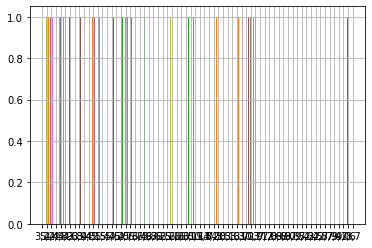

In [16]:
df_best_marka['химшлак последний Al2O3'].hist()

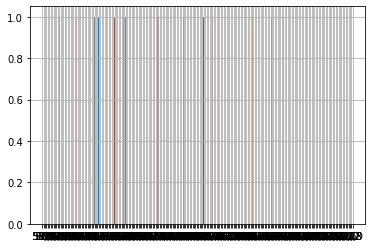

In [17]:
# let s see химшлак последний CaO 
df_best_marka['химшлак последний CaO'].hist()

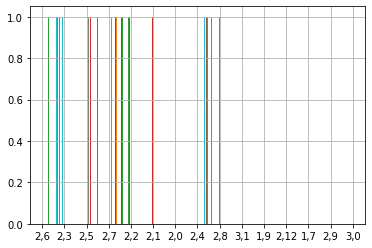

In [18]:
# let s see химшлак последний R
df_best_marka['химшлак последний R'].hist()

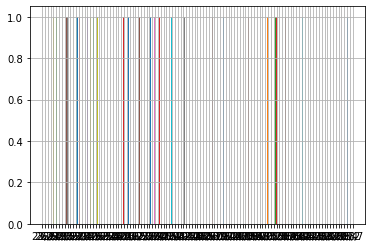

In [19]:
# let s see химшлак последний SiO2
df_best_marka['химшлак последний SiO2'].hist()

In [39]:
Target_columns=['химшлак последний Al2O3', 'химшлак последний CaO',
       'химшлак последний R','химшлак последний SiO2']


In [40]:

datetime_object_now = datetime.strptime('2071-02-11 00:46:00', '%Y-%m-%d %H:%M:%S')
df_best_marka['DT'] = \
list(map(lambda x: (datetime_object_now - datetime.strptime(x.replace('-', ' '), 
                                                            '%Y %m %d %H:%M:%S')).days, 
         df_best_marka['DT']))
df_best_marka.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,235,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,...,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,г683863<886,234,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,...,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,г683863<887,234,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,...,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,г683863<888,234,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,...,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,г683863<889,234,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,...,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN


In [41]:
df_best_marka.ffill(inplace=True)# заполнение соседними значениями
df_best_marka = df_best_marka.fillna(value=0.0) # заполнение Нанов

In [42]:
#let s see how many NaNs
df_best_marka.isnull().sum()

nplv                              0
DT                                0
МАРКА                             0
ПРОФИЛЬ                           0
t вып-обр                         0
t обработка                       0
t под током                       0
t продувка                        0
ПСН гр.                           0
чист расход C                     0
чист расход Cr                    0
чист расход Mn                    0
чист расход Si                    0
чист расход V                     0
температура первая                0
температура последняя             0
Ar (интенс.)                      0
N2 (интенс.)                      0
эл. энергия (интенс.)             0
произв жидкая сталь               0
произв количество обработок       0
произв  количество плавок         0
произв количество плавок (цел)    0
расход газ Ar                     0
расход газ  N2                    0
расход C пров.                    0
сыпуч известь РП                  0
сыпуч кварцит               

In [43]:
#  let s make X dataframe for training model
X_columns=[ 'DT', 't вып-обр', 't обработка',
       't под током', 't продувка', 'ПСН гр.', 'чист расход C',
       'чист расход Cr', 'чист расход Mn', 'чист расход Si', 'чист расход V',
       'температура первая', 'температура последняя', 'Ar (интенс.)',
       'N2 (интенс.)', 'эл. энергия (интенс.)', 'произв жидкая сталь',
       'произв количество обработок', 'произв  количество плавок',
       'произв количество плавок (цел)', 'расход газ Ar', 'расход газ  N2',
       'расход C пров.', 'сыпуч известь РП', 'сыпуч кварцит',
       'сыпуч кокс пыль УСТК', 'сыпуч  кокс. мелочь (сух.)',
       'сыпуч  кокс. мелочь КМ1', 'сыпуч  шпат плав.', 'ферспл CaC2',
       'ферспл FeMo', 'ферспл FeSi-75', 'ферспл FeV азот.', 'ферспл  FeV-80',
       'ферспл  Mn5Si65Al0.5', 'ферспл  Ni H1 пласт.', 'ферспл SiMn18',
       'ферспл  ферванит', 'ферспл  фх850А', 'эл. энергия',
       'химсталь первый Al_1', 'химсталь первый C_1', 'химсталь первый Cr_1',
       'химсталь первый Cu_1', 'химсталь первый Mn_1', 'химсталь первый Mo_1',
       'химсталь первый N_1', 'химсталь первый Ni_1', 'химсталь первый P_1',
       'химсталь первый S_1', 'химсталь первый Si_1', 'химсталь первый Ti_1',
       'химсталь первый V_1', 'химсталь последний Al', 'химсталь последний C',
       'химсталь последний Ca', 'химсталь последний Cr',
       'химсталь последний Cu', 'химсталь последний Mn',
       'химсталь последний Mo', 'химсталь последний N',
       'химсталь последний Ni', 'химсталь последний P', 'химсталь последний S',
       'химсталь последний Si', 'химсталь последний Ti',
       'химсталь последний V', 'химшлак первый Al2O3_1',
       'химшлак первый CaO_1', 'химшлак первый FeO_1', 'химшлак первый MgO_1',
       'химшлак первый MnO_1', 'химшлак первый R_1', 'химшлак первый SiO2_1',
       'химшлак последний FeO', 'химшлак последний MgO',
       'химшлак последний MnO']

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_best_marka[X_columns], 
    df_best_marka[Target_columns], 
    test_size = 0.3, 
    random_state = RS, 
    shuffle=True)

In [45]:
net = MLPRegressor(hidden_layer_sizes=(10, 12, 4),
                   verbose=True, 
                   early_stopping=True, 
                   shuffle=False, 
                   random_state=RS
)

In [46]:
net.fit(X_train,Y_train)

Iteration 1, loss = 50027.00354732
Validation score: -1865.567622
Iteration 2, loss = 7266.41982721
Validation score: -200.754995
Iteration 3, loss = 939.15758428
Validation score: -67.324499
Iteration 4, loss = 588.64867938
Validation score: -60.762390
Iteration 5, loss = 550.06645150
Validation score: -58.634277
Iteration 6, loss = 535.12108917
Validation score: -57.524775
Iteration 7, loss = 525.35638942
Validation score: -56.442226
Iteration 8, loss = 516.69904672
Validation score: -55.203828
Iteration 9, loss = 505.54837620
Validation score: -53.125211
Iteration 10, loss = 492.75891425
Validation score: -52.356678
Iteration 11, loss = 487.37209563
Validation score: -51.804624
Iteration 12, loss = 483.36835863
Validation score: -51.517969
Iteration 13, loss = 480.82429144
Validation score: -51.348614
Iteration 14, loss = 479.22605497
Validation score: -51.239959
Iteration 15, loss = 478.24685580
Validation score: -51.156874
Iteration 16, loss = 477.38263020
Validation score: -51.05

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(10, 12, 4), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=False, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [47]:
net.score(X_train,Y_train)

-0.14286928478012748

In [48]:
net.score(X_test,Y_test)

-0.10357021579147163

In [55]:
#let s see error on train and validation
print('Error on train is ',mean_absolute_error(net.predict(X_train),Y_train))
print('Error on validation is ',mean_absolute_error(net.predict(X_test),Y_test))

Error on train is  2.2031991484935545
Error on validation is  2.288107806077934


In [49]:
rf = RandomForestRegressor(
    n_estimators=150, 
    max_depth=12, 
    min_samples_split=7
)

In [50]:
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
rf.score(X_train,Y_train)

0.9312987155361563

In [52]:
rf.score(X_test,Y_test)

0.8389546138274998

In [54]:
#let s see error on train and validation
print('Error on train is ',mean_absolute_error(rf.predict(X_train),Y_train))
print('Error on validation is ',mean_absolute_error(rf.predict(X_test),Y_test))

Error on train is  0.6437125337583561
Error on validation is  0.9477296059540616
